/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


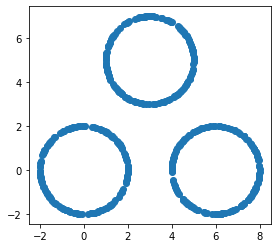

In [ ]:
import torch
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
# radius of the circle
circle_r = 2
# center of the circle (x, y)
circle_ys = [0., 0., 5.]
circle_xs = [0., 6., 3.]

x_all = []
y_all = []

for i in range(len(circle_xs)):
  circle_x = circle_xs[i]
  circle_y = circle_ys[i]


  for i in range(200):
  # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = circle_r
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    x_all.append(x)
    y_all.append(y)
  
  #print("Random point", (x, y))

plt.scatter(x_all, y_all)
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
len(x_all)

600

In [ ]:
c1 = torch.tensor([circle_xs[0], circle_ys[0]])
c2 = torch.tensor([circle_xs[1], circle_ys[1]])
c3 = torch.tensor([circle_xs[2], circle_ys[2]])


ws = []
pdist = torch.nn.PairwiseDistance(p=2)




for ind in range(len(x_all)):
  w = torch.tensor([x_all[ind], y_all[ind]])
  #a.requires_grad_()
  #b.requires_grad_()
  w.requires_grad_()
  ws.append(w)

  #print(ws)





  

In [ ]:

for epoch in range(50):
  #print('\n', epoch)
  # compute the distance
  z = 0


  for point in ws:
    #z += -1*((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += 1/((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += math.log((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += -1*((pdist(point, c1)**2) + (pdist(point, c2)**2) + (pdist(point, c3)**2))
    z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))

  
  
  z.backward()
  
  with torch.no_grad():
    for point in ws: 
      point -= 0.5*point.grad

      point.grad = None

In [ ]:
new_x = list()
new_y = list()
for i in range(len(ws)):
  x_coord = float(ws[i][0])
  y_coord = float(ws[i][1])
  new_x.append(x_coord)
  new_y.append(y_coord)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


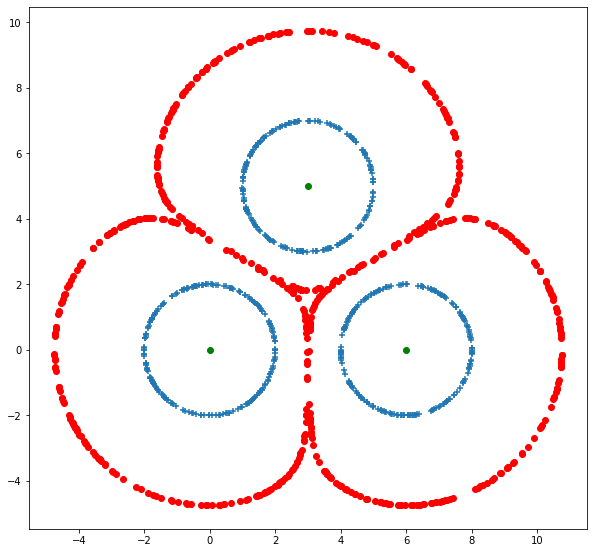

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(circle_xs[0], circle_ys[0], c='green')
plt.scatter(circle_xs[1], circle_ys[1], c='green')
plt.scatter(circle_xs[2], circle_ys[2], c='green')

plt.scatter(new_x, new_y, c='red')
plt.scatter(x_all, y_all, marker = '+')
plt.axes().set_aspect('equal')

## Hypershpere

In [16]:
import random
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
z = []


# Random float number between range 10.5 to 75.5
for i in range(5000):
  x.append(random.uniform(-1, 1))
  y.append(random.uniform(-1, 1))
  z.append(random.uniform(-1, 1))


In [17]:
import math
for i in range(len(x)):
  norm = math.sqrt(x[i]**2 + y[i]**2 + z[i]**2)
  #print(norm)
  x[i] /= norm
  y[i] /= norm
  z[i] /= norm

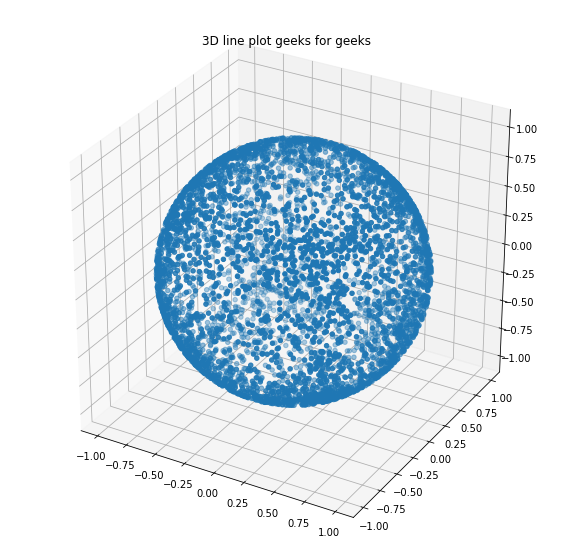

In [18]:
fig = plt.figure(figsize=(10,10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 

 
# plotting
ax.scatter(x, y, z)
ax.set_title('3D line plot geeks for geeks')

#plt.axes().set_aspect('equal')
plt.show()

In [19]:

c1 = [0.5, -1, 0]
c2 = [0.2, -1, 0.5]
c3 = [0., -1, 0]

from numpy import array
from numpy.linalg import norm

c1 /= norm(array(c1), 2)
c2 /= norm(array(c2), 2)
c3 /= norm(array(c3), 2)

In [20]:
c1

array([ 0.4472136 , -0.89442719,  0.        ])

In [21]:
samples = []
#centroid = [x[0], y[0], z[0]]
for i in range(len(x)):
  point = [x[i], y[i], z[i]]
  product = np.dot(c1, point)
  lower_bound = 0.97
  upper_bound = 0.99
  #if(product > 0.8 and product < 0.9):
  if(product > lower_bound and product < upper_bound):
      samples.append(i)

  product = np.dot(c2, point)
  #if(product > 0.8 and product < 0.9):
  if(product > lower_bound and product < upper_bound):
      samples.append(i)

  product = np.dot(c3, point)
  #if(product > 0.8 and product < 0.9):
  if(product > lower_bound and product < upper_bound):
      samples.append(i)


In [22]:
ring_x = [x[i] for i in samples]
ring_y = [y[i] for i in samples]
ring_z = [z[i] for i in samples]

In [23]:
len([x[i] for i in samples])

108

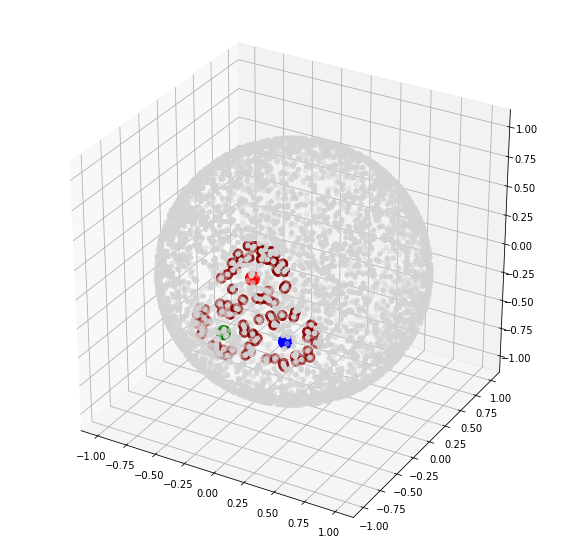

In [9]:
fig = plt.figure(figsize=(10,10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter(x, y, z, c='lightgrey')
ax.scatter(c1[0], c1[1], c1[2], c='blue', s = 200)
ax.scatter(c2[0], c2[1], c2[2], c='red', s = 200)
ax.scatter(c3[0], c3[1], c3[2], c='green', s = 200)
ax.scatter(ring_x, ring_y, ring_z, c='darkred', s = 100)
#ax.set_title('3D line plot geeks for geeks')

#plt.axes().set_aspect('equal')
plt.show()

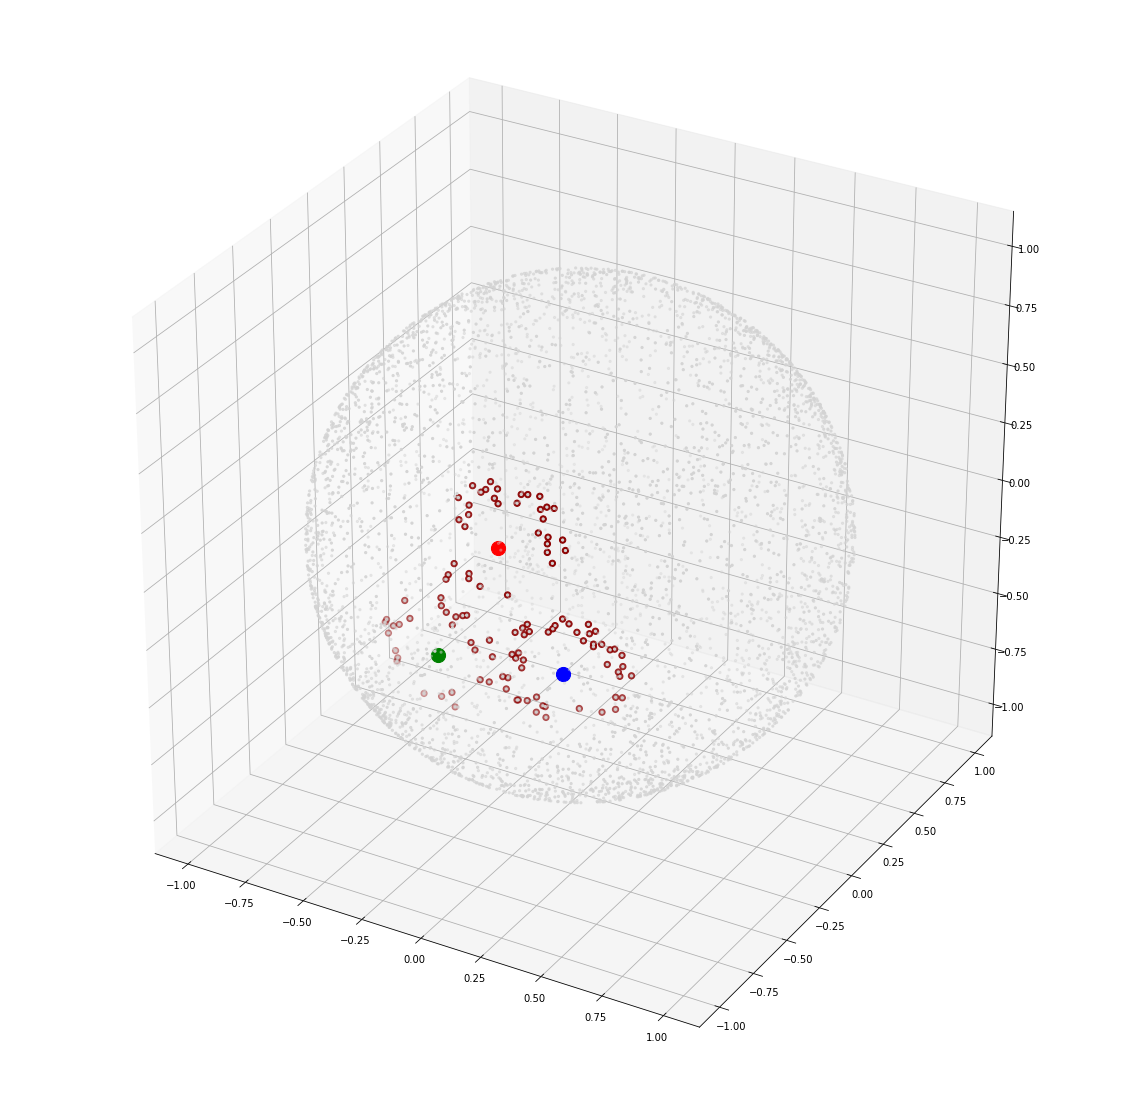

In [25]:
# again
if(True):
    fig = plt.figure(figsize=(20,20))
    
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')

    ax.scatter(x, y, z, c='lightgrey', s = 5)
    ax.scatter(c1[0], c1[1], c1[2], c='blue', s = 200)
    ax.scatter(c2[0], c2[1], c2[2], c='red', s = 200)
    ax.scatter(c3[0], c3[1], c3[2], c='green', s = 200)
    ax.scatter(ring_x, ring_y, ring_z, c='darkred', s = 40)
    #ax.scatter(updated_x, updated_y, updated_z, s = 40)
    #ax.set_title('3D line plot geeks for geeks')

    #plt.axes().set_aspect('equal')
    #plt.show()




    fig.savefig('./' + str(epoch) + '.png')

In [10]:
#Here

In [11]:
#Here 2

In [13]:
import torch
ws = []

for ind in range(len(ring_x)):
  w = torch.tensor([ring_x[ind], ring_y[ind], ring_z[ind]])

  w.requires_grad_()
  ws.append(w)


c1 = torch.tensor(c1)
c2 = torch.tensor(c2)
c3 = torch.tensor(c3)
c1 = c1.float()
c2 = c2.float()
c3 = c3.float()

pdist = torch.nn.PairwiseDistance(p=2)

epochs = 2400


for epoch in range(epochs):
  #print('\n', epoch)
  # compute the distance
  loss = 0


  for point in ws:

    # Simple L2 distance-based loss - equal penalization 
    #z += -1*((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))


    # y = 1/x loss function - 'highly penalizes a point for being close to centroid
    #z += 1/((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))


    #z += math.log((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += -1*((pdist(point, c1)**2) + (pdist(point, c2)**2) + (pdist(point, c3)**2))
    #z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))
    loss += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))

    cos_1 = torch.dot(c1, point)
    cos_2 = torch.dot(c2, point)
    cos_3 = torch.dot(c3, point)
    #z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))
    #z += -1*(torch.log(1 - cos_1) + torch.log(1 - cos_2))

    # our final loss that 'highly' penalizes a point for being close to centroid (voiled graph in ppt)
    #loss += -1*(torch.log(1 - cos_1)) + torch.log(torch.tensor(2)) + -1*(torch.log(1 - cos_2)) + torch.log(torch.tensor(2)) + -1*(torch.log(1 - cos_3)) + torch.log(torch.tensor(2))
    
    # SupCon
    # From equation (2) in SupCon paper
    #loss += torch.log(torch.exp(cos_1) + torch.exp(cos_2) + torch.exp(cos_3))
  
  #print(loss)
  
  loss.backward()
  
  with torch.no_grad():
    for point in ws:
      #print(point.grad) 
      point -= 0.005*point.grad
      point /= norm(array(point), 2)
      point.grad = None

  if(epoch < 20):
    visualization_frequency = 2
  elif (epoch < 100):
    visualization_frequency = 10
  else:
    visualization_frequency = 100
    

  if(epoch % visualization_frequency == 0):

    updated_x = [float(i[0]) for i in ws]
    updated_y = [float(i[1]) for i in ws]
    updated_z = [float(i[2]) for i in ws]

    fig = plt.figure(figsize=(20,20))
    
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')

    ax.scatter(x, y, z, c='lightgrey', s = 5)
    ax.scatter(c1[0], c1[1], c1[2], c='blue', s = 200)
    ax.scatter(c2[0], c2[1], c2[2], c='red', s = 200)
    ax.scatter(c3[0], c3[1], c3[2], c='green', s = 200)
    ax.scatter(ring_x, ring_y, ring_z, c='darkred', s = 40)
    ax.scatter(updated_x, updated_y, updated_z, s = 40)
    #ax.set_title('3D line plot geeks for geeks')

    #plt.axes().set_aspect('equal')
    #plt.show()




    fig.savefig('./images/' + str(epoch) + '.png')

Output hidden; open in https://colab.research.google.com to view.

In [14]:
!zip -r ./images.zip ./images/

  adding: images/ (stored 0%)
  adding: images/300.png (deflated 6%)
  adding: images/2000.png (deflated 7%)
  adding: images/2100.png (deflated 7%)
  adding: images/1500.png (deflated 7%)
  adding: images/90.png (deflated 6%)
  adding: images/200.png (deflated 6%)
  adding: images/8.png (deflated 6%)
  adding: images/400.png (deflated 6%)
  adding: images/2200.png (deflated 7%)
  adding: images/700.png (deflated 6%)
  adding: images/10.png (deflated 6%)
  adding: images/50.png (deflated 6%)
  adding: images/80.png (deflated 6%)
  adding: images/0.png (deflated 6%)
  adding: images/14.png (deflated 6%)
  adding: images/20.png (deflated 6%)
  adding: images/1700.png (deflated 7%)
  adding: images/1200.png (deflated 7%)
  adding: images/1300.png (deflated 7%)
  adding: images/6.png (deflated 6%)
  adding: images/100.png (deflated 6%)
  adding: images/40.png (deflated 6%)
  adding: images/1400.png (deflated 7%)
  adding: images/4.png (deflated 6%)
  adding: images/1800.png (deflated 7%)
 

In [ ]:
import torch
ws = []

for ind in range(len(ring_x)):
  w = torch.tensor([ring_x[ind], ring_y[ind], ring_z[ind]])

  w.requires_grad_()
  ws.append(w)


c1 = torch.tensor(c1)
c2 = torch.tensor(c2)
c3 = torch.tensor(c3)
c1 = c1.float()
c2 = c2.float()
c3 = c3.float()

pdist = torch.nn.PairwiseDistance(p=2)

epochs = 2400


for epoch in range(epochs):
  #print('\n', epoch)
  # compute the distance
  loss = 0


  for point in ws:

    # Simple L2 distance-based loss - equal penalization 
    #z += -1*((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))


    # y = 1/x loss function - 'highly penalizes a point for being close to centroid
    #z += 1/((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))


    #z += math.log((pdist(point, c1)) + (pdist(point, c2)) + (pdist(point, c3)))
    #z += -1*((pdist(point, c1)**2) + (pdist(point, c2)**2) + (pdist(point, c3)**2))
    #z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))
    loss += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))

    cos_1 = torch.dot(c1, point)
    cos_2 = torch.dot(c2, point)
    cos_3 = torch.dot(c3, point)
    #z += ((1/pdist(point, c1)) + (1/pdist(point, c2)) + (1/pdist(point, c3)))
    #z += -1*(torch.log(1 - cos_1) + torch.log(1 - cos_2))

    # our final loss that 'highly' penalizes a point for being close to centroid (voiled graph in ppt)
    #loss += -1*(torch.log(1 - cos_1)) + torch.log(torch.tensor(2)) + -1*(torch.log(1 - cos_2)) + torch.log(torch.tensor(2)) + -1*(torch.log(1 - cos_3)) + torch.log(torch.tensor(2))
    
    # SupCon
    # From equation (2) in SupCon paper
    #loss += torch.log(torch.exp(cos_1) + torch.exp(cos_2) + torch.exp(cos_3))
  
  #print(loss)
  
  loss.backward()
  
  with torch.no_grad():
    for point in ws:
      #print(point.grad) 
      point -= 0.005*point.grad
      point /= norm(array(point), 2)
      point.grad = None

  if(epoch < 20):
    visualization_frequency = 2
  elif (epoch < 100):
    visualization_frequency = 10
  else:
    visualization_frequency = 100
    

  if(epoch % visualization_frequency == 0):

    updated_x = [float(i[0]) for i in ws]
    updated_y = [float(i[1]) for i in ws]
    updated_z = [float(i[2]) for i in ws]

    fig = plt.figure(figsize=(20,20))
    
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')

    ax.scatter(x, y, z, c='lightgrey', s = 5)
    ax.scatter(c1[0], c1[1], c1[2], c='blue', s = 200)
    ax.scatter(c2[0], c2[1], c2[2], c='red', s = 200)
    ax.scatter(c3[0], c3[1], c3[2], c='green', s = 200)
    ax.scatter(ring_x, ring_y, ring_z, c='darkred', s = 40)
    ax.scatter(updated_x, updated_y, updated_z, s = 40)
    #ax.set_title('3D line plot geeks for geeks')

    #plt.axes().set_aspect('equal')
    #plt.show()




    fig.savefig('./images/' + str(epoch) + '.png')